<a href="https://colab.research.google.com/github/theamitmehra/Oasis-Infobyte-projects/blob/main/SMS_Spam_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as npr
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [22]:
# Load the dataset

file_path = "/content/spam.csv"  # Replace with your file path
df = pd.read_csv(file_path, encoding='latin-1')

In [23]:
# download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Drop unnecessary columns
df = df.iloc[:, :2]
df.columns = ['category', 'message']

In [25]:
# Preprocessing function
def preprocess_text(text):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize, remove stopwords, and apply stemming
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join back into a single string
    return ' '.join(words)

## Preprocessing the data

In [26]:
df['message_processed'] = df['message'].apply(preprocess_text)

## Encoding the labels

In [28]:
df['category_encoded'] = df['category'].map({'ham': 0, 'spam': 1})

## Splitting the dataset

In [30]:
X = df['message_processed']
y = df['category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF Vectorization

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Building the Logistic Regression Model

In [32]:
lr_classifier = LogisticRegression(max_iter=200, class_weight="balanced", random_state=42)

## training the model

In [36]:
lr_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

## model prediction

In [37]:
y_pred = lr_classifier.predict(X_test_tfidf)

## model evaluation

In [38]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [39]:
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

Logistic Regression Model Performance:
Accuracy: 0.9757847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[952  13]
 [ 14 136]]


## model saving

In [40]:
import joblib
joblib.dump(lr_classifier, 'logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

# Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## building naive classifier

In [42]:
nb_classifier = MultinomialNB()

## model training

In [43]:
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

## Model prediction

In [44]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)

## Model evaluation

In [45]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)

In [46]:
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb}")
print("\nClassification Report:\n", classification_rep_nb)
print("\nConfusion Matrix:\n", confusion_mat_nb)

Naive Bayes Model Performance:
Accuracy: 0.9739910313901345

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   0]
 [ 29 121]]


## Saving the model

In [47]:
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

## training a random classifier

In [51]:
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

## Model prediction

In [52]:
y_pred_rf = rf_classifier.predict(X_test_tfidf)

## Model evaluation

In [53]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

In [54]:
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", classification_rep_rf)
print("\nConfusion Matrix:\n", confusion_mat_rf)

Random Forest Model Performance:
Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[965   0]
 [ 23 127]]


In [55]:
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

Evaluating Logistic Regression...

Logistic Regression Results:
Accuracy: 0.9757847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[952  13]
 [ 14 136]]
Evaluating Random Forest...

Random Forest Results:
Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   0]
 [ 23 127]]
Evaluating Naive Bayes...

Naive Bayes Re

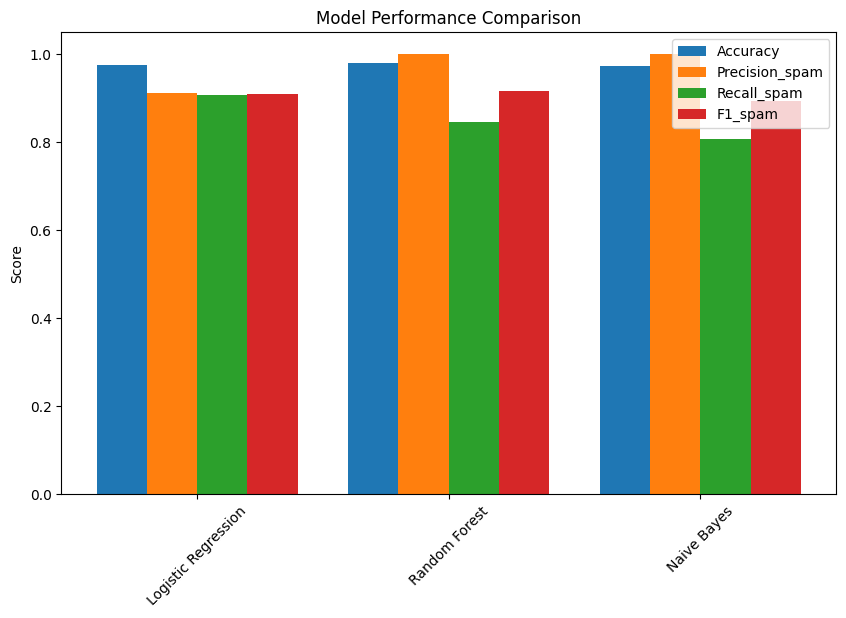

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Models already trained
models = {
    "Logistic Regression": lr_classifier,  # Replace with your logistic regression model variable
    "Random Forest": rf_classifier,       # Replace with your random forest model variable
    "Naive Bayes": nb_classifier          # Replace with your naive bayes model variable
}

# Dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)  # Predict using the model

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "precision_spam": report["1"]["precision"],
        "recall_spam": report["1"]["recall"],
        "f1_spam": report["1"]["f1-score"],
        "confusion_matrix": confusion,
    }

    # Print metrics for each model
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Tabular summary of results
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[["accuracy", "precision_spam", "recall_spam", "f1_spam"]]
print("\nModel Performance Comparison:")
print(comparison_df)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ["accuracy", "precision_spam", "recall_spam", "f1_spam"]
x = np.arange(len(models))  # Bar positions
width = 0.2

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, comparison_df[metric], width, label=metric.capitalize())

# Formatting the plot
ax.set_title("Model Performance Comparison")
ax.set_xticks(x + width * (len(metrics) / 2 - 0.5))
ax.set_xticklabels(models.keys())
ax.set_ylabel("Score")
ax.legend()
plt.xticks(rotation=45)
plt.show()